<B><font size=5>Introduction</font></B>
<BR>
<BR>
This is 2021 Kaggle Survey.<BR>
<BR>
After seeing the insight of Survey, I found a lot of students would like to be Data Scientist in the future.<BR>
If I am a student who would like to be Data Scientist in the future, I think I would research and make a strategy for that.<BR>
<BR>
Data Scientist is one of the toughest job since you are required not only skills of programming, many knowledge of Models, but also you have to know domain knowledge and show <B><font color="red">business impact in real world</font></B>.<BR>
Since then, I assume, needed tools and (e.g. BI tool, Cloud, GPU/TPU) for Data Scientist is always changing and following trend is important.<BR>
<BR>
In this time, I would like to look through the Kaggle Survey 2021 data.The scope is people in six different countries(<B><font color="red">U.S., India, Japan, China, Brazil, Russia</font></B>) <br>
and belong to six different professions (<B><font color="red">Data Scientist, Software Engineer, Data Analyst, Research Scientist, Machine Learning Engineer</font></B>) to see what technologies they are currently using.<BR>
<BR>
<B><font color="red">Let's take a look at how this data can help you strategize your way into a career involving data like Data Scientists do!</font></B><BR>
<BR>
I hope this article gives you something to think about.

![](https://images.unsplash.com/photo-1507679799987-c73779587ccf?ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8am9iJTIwc2Vla2VyfGVufDB8fDB8fA%3D%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60)

<B><font size=5>Research the Job Market</font></B>
<BR>
<BR>
Firstly, let's see how many jobs are available in your city. Then, see which positions are available, such as Data Scientist, Data Analyst, etc. <BR>
Even if you study, you will not be able to get a job without a position. The first step is to research jobs.<BR>
<BR>
I think the easiest way to do research is on <B><font color="red">LinkedIn</font></B>. Fill in your city and position and see what companies are hiring.<BR>
<BR>
[LinkedIn](https://www.linkedin.com/)
<BR>
<BR>
Since the meaning of each title (e.g."Data Scientist", "Data Analyst") is not defined clearly, I highly recommend to check the <B><font color="red">Responsibilities</font></B> and <B><font color="red">Qualifications</font></B> part.<BR>
Now you understand what kind of skills and responsibilities you would be required in the future and makes it easier to plan your strategy.

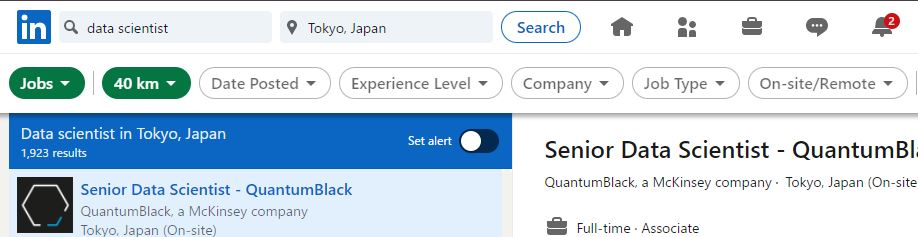

<B><font size=5>Kaggle Survey</font></B>
<BR>
<BR>
After researching on Linkedin, let's move to the next step.<BR>
Let's dive into the Survey data and check what kind of skills Pros use now.<BR>
    
**Note**：<font color="red">This is not necessarily indicative of the current job market, but it is a hint.</font>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [ ]:
Survey_2021 = pd.read_csv("../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")

In [ ]:
Professions = [
    "Data Scientist", "Software Engineer","Data Analyst",
    "Research Scientist","Machine Learning Engineer"
]

Countries = [
    "India","United States of America",
    "Japan","China","Brazil","Russia"
]

Survey_Pro=Survey_2021[(Survey_2021['Q5'].isin(Professions))&(Survey_2021['Q3'].isin(Countries))].reset_index(drop=True)
Survey_Pro.head()

If you would like to briefly check the data, I would recommend to download data and use pivot tabel on excel.

In [ ]:
# import the modules we'll need
from IPython.display import HTML
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "Survey_JP.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# Survey_JP.to_csv("Survey_JP.csv",index=False)

# create a link to download the dataframe
create_download_link(Survey_Pro)

<B><font size=5>Students vs Non-students</font></B><br>
<br>
Firstly, I would like to check the Ratio between students and non-students.<BR>
It appears that about 25% of the respondents are students and 75% are working people. <BR>
We can see that the majority of students are from India and outside of the six target countries.<BR>

In [ ]:
def check_student(x):
    if x == 'Student':
        return 'Student'
    else:
        return 'Non-Student'

def isin_6countries(x):
    if x in ['India','United States of America','Japan','Russia','Brazil','China']:
        return x
    else:
        return "Other Country"
    
Survey_2021['IsStudent']=Survey_2021['Q5'].apply(check_student)
Survey_2021['IsCountry']=Survey_2021['Q3'].apply(isin_6countries)


df=Survey_2021[['IsStudent','IsCountry']].value_counts().reset_index().sort_values(by='IsStudent').reset_index(drop=True)
df.columns = ['IsStudent','Country','Total']

df.groupby(['IsStudent','Country'])['Total'].sum().reset_index()
for i in range(df.shape[0]):
    if df.loc[i,'IsStudent']=='Non-Student':
        df.loc[i,'Country'] = 'Non-Student'

plt.figure(figsize=(15,8))

labels_small = df.groupby(['IsStudent'])['Total'].sum().index
sizes_small = df.groupby(['IsStudent'])['Total'].sum()
colors_small = ['#FFFACD', '#00bfff', '#FFE9B2', '#30B7EA','#56C7F2','#7FD6F7']

labels_big = df.groupby(['Country'])['Total'].sum().sort_values(ascending=False).index #df['Country'].value_counts().index
sizes_big = df.groupby(['Country'])['Total'].sum().sort_values(ascending=False) #df['Country'].value_counts()
colors_big = ['#FFCE53', '#87cefa', '#add8e6','#30B7EA','#87CEEB','#7FD6F7', '#B3E7FB']
 
bigger  = plt.pie(sizes_big, labels=labels_big, colors=colors_big, startangle=90, labeldistance=1.0)#, frame=True
smaller = plt.pie(sizes_small, labels=labels_small, colors=colors_small,radius=0.7, startangle=90, labeldistance=0.5)

centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
        
plt.axis('equal')
plt.tight_layout()
plt.title("Students vs Non-Students")

plt.show()

<B><font size=5>In your country, are there many data science jobs?</font></B><BR>
<BR>
Let's look at the percentage of survey respondents by country and job title.<BR>

In [ ]:
df = Survey_Pro[['Q5','Q3']].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession','Country','Count']
df=df.sort_values(by=['Country','Count'],ascending=False).reset_index(drop=True)
df.style.bar(subset=['Count'], align='mid', color=['#d65f5f', '#5fba7d'])

In [ ]:
df = Survey_Pro[['Q3']].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Country','Count']

plt.figure(figsize=(15,8))

# create data
names = df['Country']
size = df['Count']

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['red','purple','green','yellow','blue','skyblue'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.title("Respondents (Data Scientist, Software Engineer, Data Analyst, Research Scientist, Machine Learning Engineer) of the Survey")
plt.show()

<B><font size=5>Job Titles</font></B>
<BR>
Let's see job titles and ratio by counrties.

In [ ]:
Order_list = ['India','United States of America','Japan','Russia','Brazil','China']

df = Survey_Pro[['Q5','Q3']].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession','Country','Count']
df=df.sort_values(by=['Country','Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = 'Country', y = 'Count', data = df, hue='Profession',order = Order_list ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.legend(loc='upper right')
plt.xlabel("Country",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

<B><font size=5>Who becomes Data Scientist?</font></B>
<BR>
It is likely to be seen that many people's final education is a master's or bachelor's degree, and they do not necessarily need to go to a doctoral program.<BR>

In [ ]:
df = Survey_Pro['Q4'].value_counts().sort_values(ascending=False).reset_index().head(7)
df.columns = ['Education','Count']
df.sort_values(by='Education',ascending=False)

plt.figure(figsize=(15,8)) 

sns.barplot(x = 'Education', y = 'Count', data = df.sort_values(by='Count',ascending=False), alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.legend(loc='upper right')
plt.xlabel("Education",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("highest level of educational background")
plt.show()

<B><font size=5>Programming Language</font></B><BR>
<BR>
It seems that python is by far the most popular. <BR>
SQL is also a necessary skill to load data.<BR>

In [ ]:
#https://note.nkmk.me/python-pandas-stack-unstack-pivot/
Cols = ['Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6','Q7_Part_7','Q7_Part_8','Q7_Part_9','Q7_Part_10','Q7_Part_11','Q7_Part_12','Q7_OTHER']
lang = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other']


df_Q7 = Survey_Pro[['Q5','Q3']+Cols].reset_index(drop=True)
df_Q7 = df_Q7.groupby(['Q5','Q3'])[Cols].count().reset_index()
df_Q7.columns = ['Q5', 'Q3'] + lang
df_Q7=df_Q7.groupby(['Q5','Q3']).sum().stack().reset_index()
df_Q7.columns = ['Q5', 'Q3','Language','Count']

plt.figure(figsize=(15,8)) 

sns.barplot(x ='Language', y = 'Count', data = df_Q7, hue='Q5' ,alpha=0.7,ci=None)
# Show the plot
plt.xticks(rotation=270)
plt.legend(loc='upper right')
plt.xlabel("Programming Language",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()


<B><font size=5>Which IDE do you use on a regular basis?</font></B>

In [ ]:
Cols = ['Q9_Part_1','Q9_Part_2','Q9_Part_3','Q9_Part_4','Q9_Part_5','Q9_Part_6','Q9_Part_7','Q9_Part_8','Q9_Part_9','Q9_Part_10','Q9_Part_11','Q9_Part_12','Q9_OTHER']
lang = ['Jupyter','RStudio','Visual Studio','Visual Studio Code (VSCode)','PyCharm','Spyder','Notepad++','Sublime Text','Vim / Emacs','MATLAB','Jupyter Notebook','None','Other']



df_Q7 = Survey_Pro[['Q5','Q3']+Cols].reset_index(drop=True)
df_Q7 = df_Q7.groupby(['Q5','Q3'])[Cols].count().reset_index()
df_Q7.columns = ['Q5', 'Q3'] + lang
df_Q7=df_Q7.groupby(['Q5','Q3']).sum().stack().reset_index()
df_Q7.columns = ['Q5', 'Q3','Language','Count']

plt.figure(figsize=(15,8)) 

sns.barplot(x ='Language', y = 'Count', data = df_Q7, hue='Q5' ,alpha=0.7,ci=None)
# Show the plot
plt.xticks(rotation=270)
plt.legend(loc='best')
plt.xlabel("Programming Language",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

<B><font size=5>Which Industry should I go?</font></B>

In [ ]:
list_item = []
df_temp = Survey_Pro[['Q20']].value_counts().reset_index()
for i in range(df_temp.shape[0]):
    #print(df_temp.loc[i,'Q20'])
    list_item.append(df_temp.loc[i,'Q20'])

Order_list = list_item[:10]

Question = 'Industry'
df = Survey_Pro[['Q5','Q20']].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.legend(loc='upper right')
plt.xlabel("Platform",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

<B><font size=5>Should I go to big company or Start-up?</font></B>
<BR>
If you would like to be Data Scientist (or Equivalent role), the first question is "Should I go to big company or Start-up?".<BR>
Although large companies are stable, it is very difficult for them to change their business and there might not be proper position.<BR>

<BR>

In [ ]:
Order_list = [
    '10,000 or more employees','1000-9,999 employees','250-999 employees',
    '50-249 employees','0-49 employees'
]

Question = 'Industry'
df = Survey_Pro[['Q5','Q21']].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.legend(loc='best')
plt.xlabel("Platform",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.ylim([0,800])
plt.show()

<B><font size=5>Company size by country</font><B>

In [ ]:
Order_list = [
    '10,000 or more employees','1000-9,999 employees','250-999 employees',
    '50-249 employees','0-49 employees'
]

Question = 'Industry'
df = Survey_Pro[['Q5','Q21']][Survey_Pro['Q3']=='India'].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.title("India")
plt.legend(loc='best')
plt.xlabel("Company size",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.ylim([0,400])
plt.show()

In [ ]:
#'India','United States of America','Japan','Russia','Brazil','China'
Order_list = [
    '10,000 or more employees','1000-9,999 employees','250-999 employees',
    '50-249 employees','0-49 employees'
]

Question = 'Industry'
df = Survey_Pro[['Q5','Q21']][Survey_Pro['Q3']=='United States of America'].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.title("United States of America")
plt.legend(loc='best')
plt.xlabel("Company size",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.ylim([0,200])
plt.show()

In [ ]:
#'India','United States of America','Japan','Russia','Brazil','China'
Order_list = [
    '10,000 or more employees','1000-9,999 employees','250-999 employees',
    '50-249 employees','0-49 employees'
]

Question = 'Industry'
df = Survey_Pro[['Q5','Q21']][Survey_Pro['Q3']=='Japan'].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.title("Japan")
plt.legend(loc='best')
plt.xlabel("Company size",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.ylim([0,50])
plt.show()

In [ ]:
#'India','United States of America','Japan','Russia','Brazil','China'
Order_list = [
    '10,000 or more employees','1000-9,999 employees','250-999 employees',
    '50-249 employees','0-49 employees'
]

Question = 'Industry'
df = Survey_Pro[['Q5','Q21']][Survey_Pro['Q3']=='Russia'].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.title("Russia")
plt.legend(loc='best')
plt.xlabel("Company size",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.ylim([0,50])
plt.show()

In [ ]:
#'India','United States of America','Japan','Russia','Brazil','China'
Order_list = [
    '10,000 or more employees','1000-9,999 employees','250-999 employees',
    '50-249 employees','0-49 employees'
]

Question = 'Industry'
df = Survey_Pro[['Q5','Q21']][Survey_Pro['Q3']=='Brazil'].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.title("Brazil")
plt.legend(loc='best')
plt.xlabel("Company size",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.ylim([0,50])
plt.show()

In [ ]:
#'India','United States of America','Japan','Russia','Brazil','China'
Order_list = [
    '10,000 or more employees','1000-9,999 employees','250-999 employees',
    '50-249 employees','0-49 employees'
]

Question = 'Industry'
df = Survey_Pro[['Q5','Q21']][Survey_Pro['Q3']=='China'].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.title("China")
plt.legend(loc='best')
plt.xlabel("Company size",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.ylim([0,50])
plt.show()

<B><font size=5>Cloud</font></B>

In [ ]:
Order_list = [
    ' Amazon Web Services (AWS) ',' Google Cloud Platform (GCP) ',
    ' Microsoft Azure ',' IBM Cloud / Red Hat ','They all had a similarly enjoyable developer experience']

Question = 'Cloud'
df = Survey_Pro[['Q5','Q28']].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.legend(loc='best')
plt.xlabel("Platform",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.ylim([0,200])
plt.show()

<B><font size=5>Big data products (relational database, data warehouse, data lake, or similar) </font></B>
<BR>
<BR>
Data Scientist needs to load from Database and data is becoming bigger and bigger.<BR>
I believe that the skills involved in databases and database will change accordingly.<BR>
Let's take a look at the current trends.

In [ ]:
Order_list = [
    'MySQL ','Google Cloud BigQuery ','PostgreSQL ','Microsoft SQL Server ',
    'Amazon Redshift ','Oracle Database '
    ]

Question = 'Cloud'
df = Survey_Pro[['Q5','Q33']].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list  ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.legend(loc='best')
plt.xlabel("Platform",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.ylim([0,200])
plt.show()

Q35 : Which of the following business intelligence tools do you use most often?

In [ ]:
list_item = []
df_temp = Survey_Pro[['Q35']].value_counts().reset_index()
for i in range(df_temp.shape[0]):
    #print(df_temp.loc[i,'Q35'])
    list_item.append(df_temp.loc[i,'Q35'])

Order_list = list_item[:5]

Question = 'BI Tools'
df = Survey_Pro[['Q5','Q35']].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list  ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.legend(loc='best')
plt.xlabel("BI Tools",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.ylim([0,200])
plt.show()

In [ ]:
#'India','United States of America','Japan','Russia','Brazil','China'
list_item = []
df_temp = Survey_Pro[['Q35']].value_counts().reset_index()
for i in range(df_temp.shape[0]):
    #print(df_temp.loc[i,'Q35'])
    list_item.append(df_temp.loc[i,'Q35'])

Order_list = list_item[:5]

Question = 'BI Tools'
df = Survey_Pro[['Q5','Q35']][Survey_Pro['Q3']=='India'].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list  ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.title("India")
plt.legend(loc='best')
plt.xlabel("BI Tools",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.ylim([0,100])
plt.show()

In [ ]:
#'India','United States of America','Japan','Russia','Brazil','China'
list_item = []
df_temp = Survey_Pro[['Q35']].value_counts().reset_index()
for i in range(df_temp.shape[0]):
    #print(df_temp.loc[i,'Q35'])
    list_item.append(df_temp.loc[i,'Q35'])

Order_list = list_item[:5]

Question = 'BI Tools'
df = Survey_Pro[['Q5','Q35']][Survey_Pro['Q3']=='United States of America'].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list  ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.title("United States of America")
plt.legend(loc='best')
plt.xlabel("BI Tools",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.ylim([0,50])
plt.show()

In [ ]:
#'India','United States of America','Japan','Russia','Brazil','China'
list_item = []
df_temp = Survey_Pro[['Q35']].value_counts().reset_index()
for i in range(df_temp.shape[0]):
    #print(df_temp.loc[i,'Q35'])
    list_item.append(df_temp.loc[i,'Q35'])

Order_list = list_item[:5]

Question = 'BI Tools'
df = Survey_Pro[['Q5','Q35']][Survey_Pro['Q3']=='Japan'].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list  ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.title("Japan")
plt.legend(loc='best')
plt.xlabel("BI Tools",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.ylim([0,10])
plt.show()

In [ ]:
#'India','United States of America','Japan','Russia','Brazil','China'
list_item = []
df_temp = Survey_Pro[['Q35']].value_counts().reset_index()
for i in range(df_temp.shape[0]):
    #print(df_temp.loc[i,'Q35'])
    list_item.append(df_temp.loc[i,'Q35'])

Order_list = list_item[:5]

Question = 'BI Tools'
df = Survey_Pro[['Q5','Q35']][Survey_Pro['Q3']=='Russia'].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list  ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.title("Russia")
plt.legend(loc='best')
plt.xlabel("BI Tools",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.ylim([0,10])
plt.show()

In [ ]:
#'India','United States of America','Japan','Russia','Brazil','China'
list_item = []
df_temp = Survey_Pro[['Q35']].value_counts().reset_index()
for i in range(df_temp.shape[0]):
    #print(df_temp.loc[i,'Q35'])
    list_item.append(df_temp.loc[i,'Q35'])

Order_list = list_item[:5]

Question = 'BI Tools'
df = Survey_Pro[['Q5','Q35']][Survey_Pro['Q3']=='Brazil'].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list  ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.title("Brazil")
plt.legend(loc='best')
plt.xlabel("BI Tools",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.ylim([0,10])
plt.show()

In [ ]:
#'India','United States of America','Japan','Russia','Brazil','China'
list_item = []
df_temp = Survey_Pro[['Q35']].value_counts().reset_index()
for i in range(df_temp.shape[0]):
    #print(df_temp.loc[i,'Q35'])
    list_item.append(df_temp.loc[i,'Q35'])

Order_list = list_item[:5]

Question = 'BI Tools'
df = Survey_Pro[['Q5','Q35']][Survey_Pro['Q3']=='China'].value_counts().sort_values(ascending=False).reset_index()
df.columns = ['Profession',Question,'Count']
df=df.sort_values(by=[Question,'Count'],ascending=False)
df.head(20)

plt.figure(figsize=(15,8)) 

sns.barplot(x = Question, y = 'Count', data = df, hue='Profession',order = Order_list  ,alpha=0.7)
 
# Show the plot
plt.xticks(rotation=270)
plt.title("China")
plt.legend(loc='best')
plt.xlabel("BI Tools",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.ylim([0,6])
plt.show()

This is just first release.<BR>
<BR>
This time it will just be a simple visualization. <BR>
I would like to start thinking about data insights and strategies for employment now.<BR>
<BR>
**To be continued...**